# VGGT Attention Map Visualization

這個 notebook 展示如何提取和視覺化 VGGT 模型中的 attention maps。

## 功能：
- **Mode 1 (visualize)**: 生成類似 paper 的 attention map 視覺化
- **Mode 2 (data)**: 取得原始 attention weight 數值

## 架構說明：
- VGGT 有 24 個 blocks (0-23)
- 每個 block 有兩種 attention: `global` 和 `frame`
- 每個 attention 有多個 heads
- 每個 image 產生多個 tokens (camera token, register tokens, patch tokens)

In [1]:
# 導入必要的套件
import sys
sys.path.insert(0, '.')

from visualize_attention import demo_single_layer_attention
import matplotlib.pyplot as plt

/home/jason/anaconda3/envs/vggt/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# # 設定要使用的圖片
# image_paths = [
#     "examples/llff_flower/images/000.png",
#     "examples/llff_flower/images/005.png",
#     "examples/llff_flower/images/010.png"
# ]
# 設定要使用的圖片
image_paths = [
    "examples/kitchen/images/00.png",
    "examples/kitchen/images/01.png",
    "examples/kitchen/images/02.png"
]


## Mode 1: 視覺化模式

顯示特定 block、token、head 的 attention map

VGGT Attention Map Extraction Demo
Device: cuda
Loading model...
Loading images: 3 images
Registering hook for global_block_23
Running forward pass...

Extracted attention map:
  Shape: torch.Size([1, 16, 2790, 2790])
  [Batch, Num_Heads, Num_Tokens, Num_Tokens]
  Batch size: 1
  Number of heads: 16
  Number of tokens: 2790

Returning raw attention data...

實際的 token 數量: 2790
使用的 token_idx: 500
VGGT Attention Map Extraction Demo
Device: cuda
Loading model...
Loading images: 3 images
Registering hook for global_block_23
Running forward pass...

Extracted attention map:
  Shape: torch.Size([1, 16, 2790, 2790])
  [Batch, Num_Heads, Num_Tokens, Num_Tokens]
  Batch size: 1
  Number of heads: 16
  Number of tokens: 2790

Visualizing attention for token 500, head 0...


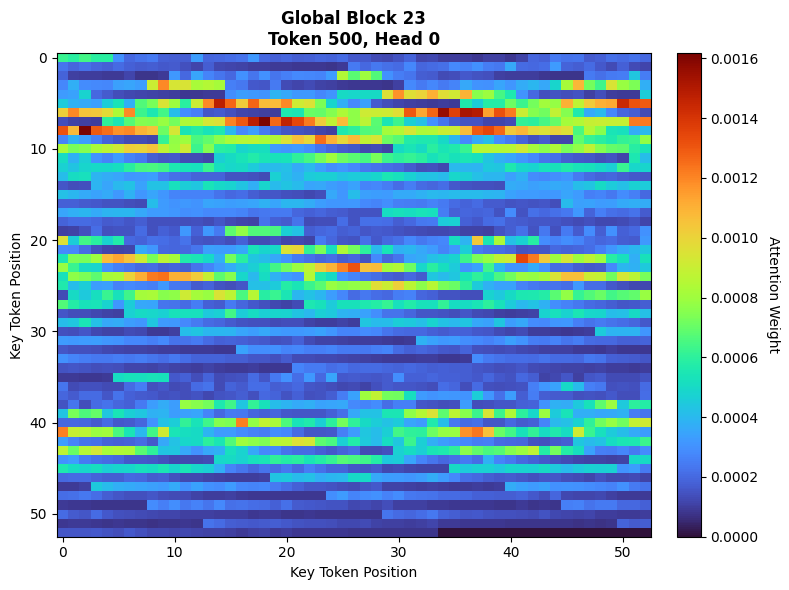

In [3]:
# 測試單層 attention 視覺化
# 參數說明：
# - block_idx: 要視覺化的 block (0-23)
# - attention_type: 'global' 或 'frame'
# - token_idx: 要視覺化哪個 token 的 attention
# - head_idx: 要視覺化哪個 attention head (0-15)
# - mode: 'visualize' 顯示圖片，'data' 回傳數值

# 先用 data 模式查看實際的 token 數量
data = demo_single_layer_attention(
    image_paths,
    block_idx=23,
    attention_type='global',
    token_idx=0,  # 先用第一個 token
    head_idx=0,
    mode='data'
)
print(f"\n實際的 token 數量: {data['num_tokens']}")

# 使用安全的 token_idx（不超過實際數量）
safe_token_idx = min(500, data['num_tokens'] - 1)
print(f"使用的 token_idx: {safe_token_idx}")

fig = demo_single_layer_attention(
    image_paths,
    block_idx=23,        # 使用最後一層 (block 23)
    attention_type='global',  # 使用 global attention
    token_idx=safe_token_idx,  # 使用安全的 token index
    head_idx=0,          # 使用第 0 個 head
    mode='visualize'     # 視覺化模式
)

## Mode 2: 數據模式

取得原始 attention weights 數值

In [4]:
# 取得原始 attention 數據
# 使用之前查詢的 safe_token_idx
data = demo_single_layer_attention(
    image_paths,
    block_idx=23,
    attention_type='global',
    token_idx=safe_token_idx,
    head_idx=0,
    mode='data'  # 數據模式
)

print("\n返回的數據:")
print(f"Keys: {data.keys()}")
print(f"Attention weights shape: {data['attention_weights'].shape}")
print(f"Layer name: {data['layer_name']}")
print(f"Number of heads: {data['num_heads']}")
print(f"Number of tokens: {data['num_tokens']}")

VGGT Attention Map Extraction Demo
Device: cuda
Loading model...
Loading images: 3 images
Registering hook for global_block_23
Running forward pass...

Extracted attention map:
  Shape: torch.Size([1, 16, 2790, 2790])
  [Batch, Num_Heads, Num_Tokens, Num_Tokens]
  Batch size: 1
  Number of heads: 16
  Number of tokens: 2790

Returning raw attention data...

返回的數據:
Keys: dict_keys(['attention_weights', 'layer_name', 'layer_type', 'num_heads', 'num_tokens'])
Attention weights shape: torch.Size([1, 16, 2790, 2790])
Layer name: global_block_23
Number of heads: 16
Number of tokens: 2790


## 測試不同的 blocks 和 heads

VGGT Attention Map Extraction Demo
Device: cuda
Loading model...
Loading images: 3 images
Registering hook for global_block_0
Running forward pass...

Extracted attention map:
  Shape: torch.Size([1, 16, 2790, 2790])
  [Batch, Num_Heads, Num_Tokens, Num_Tokens]
  Batch size: 1
  Number of heads: 16
  Number of tokens: 2790

Returning raw attention data...
使用 token_idx: 500
Processing block 0...
VGGT Attention Map Extraction Demo
Device: cuda
Loading model...
Loading images: 3 images
Registering hook for global_block_0
Running forward pass...

Extracted attention map:
  Shape: torch.Size([1, 16, 2790, 2790])
  [Batch, Num_Heads, Num_Tokens, Num_Tokens]
  Batch size: 1
  Number of heads: 16
  Number of tokens: 2790

Returning raw attention data...
Processing block 5...
VGGT Attention Map Extraction Demo
Device: cuda
Loading model...
Loading images: 3 images
Registering hook for global_block_5
Running forward pass...

Extracted attention map:
  Shape: torch.Size([1, 16, 2790, 2790])
  [Ba

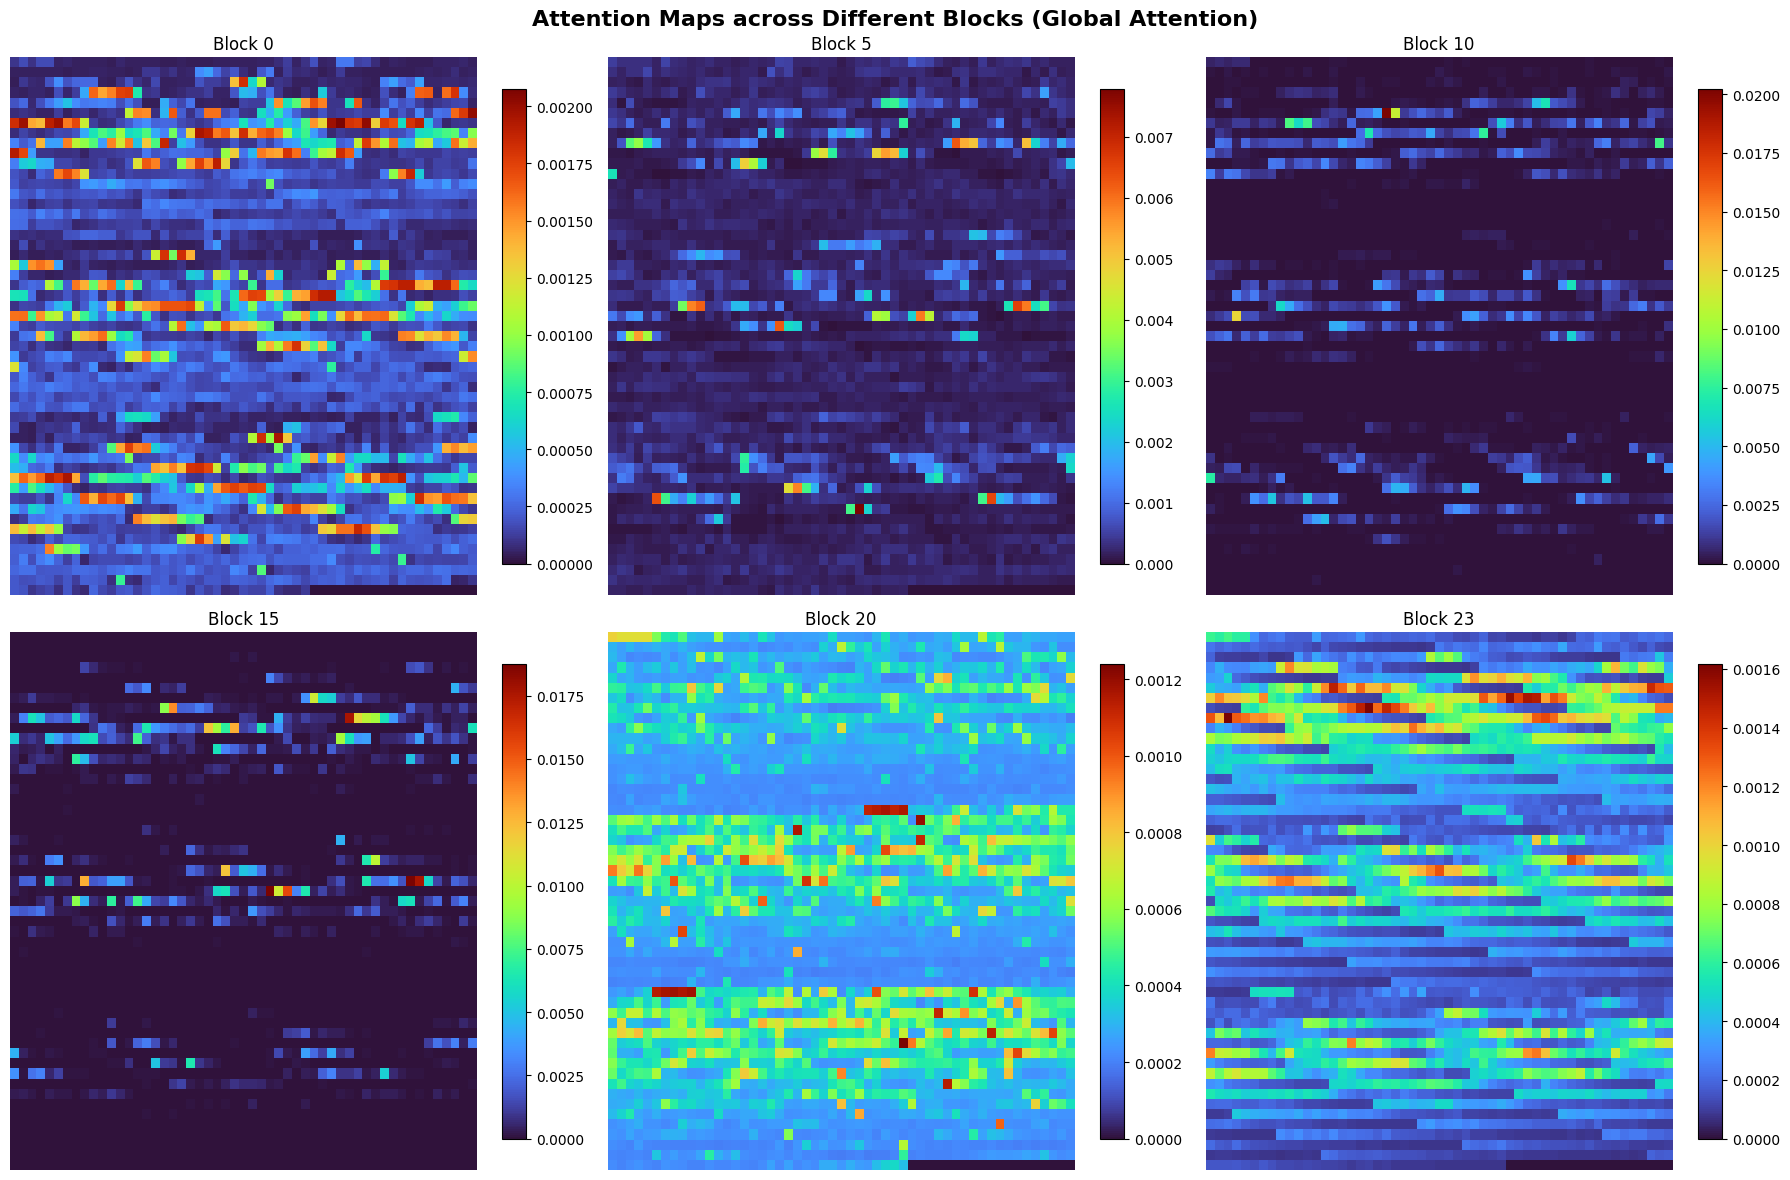


完成！


In [5]:
# 比較不同 blocks 的 attention patterns
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Attention Maps across Different Blocks (Global Attention)', fontsize=16, fontweight='bold')

blocks_to_test = [0, 5, 10, 15, 20, 23]

# 先確定一個安全的 token_idx
test_data = demo_single_layer_attention(
    image_paths,
    block_idx=0,
    attention_type='global',
    token_idx=0,
    head_idx=0,
    mode='data'
)
safe_token_idx = min(500, test_data['num_tokens'] - 1)
print(f"使用 token_idx: {safe_token_idx}")

for idx, block_idx in enumerate(blocks_to_test):
    print(f"Processing block {block_idx}...")
    data = demo_single_layer_attention(
        image_paths,
        block_idx=block_idx,
        attention_type='global',
        token_idx=safe_token_idx,
        head_idx=0,
        mode='data'
    )
    
    # 取得 attention weights
    attn = data['attention_weights'][0, 0, safe_token_idx, :].numpy()  # [num_tokens]
    
    # Reshape to 2D - 使用 ceil 確保 grid_size^2 >= num_tokens
    import numpy as np
    num_tokens = len(attn)
    grid_size = int(np.ceil(np.sqrt(num_tokens)))
    attn_padded = np.zeros(grid_size * grid_size)
    attn_padded[:num_tokens] = attn
    attn_2d = attn_padded.reshape(grid_size, grid_size)
    
    # Plot
    row, col = idx // 3, idx % 3
    im = axes[row, col].imshow(attn_2d, cmap='turbo', aspect='auto')
    axes[row, col].set_title(f'Block {block_idx}')
    axes[row, col].axis('off')
    plt.colorbar(im, ax=axes[row, col], fraction=0.046)

plt.tight_layout()
plt.show()
print("\n完成！")

## 比較 Frame Attention vs Global Attention

VGGT Attention Map Extraction Demo
Device: cuda
Loading model...
Loading images: 3 images
Registering hook for global_block_23
Running forward pass...

Extracted attention map:
  Shape: torch.Size([1, 16, 2790, 2790])
  [Batch, Num_Heads, Num_Tokens, Num_Tokens]
  Batch size: 1
  Number of heads: 16
  Number of tokens: 2790

Returning raw attention data...
使用 token_idx: 500
Processing frame attention...
VGGT Attention Map Extraction Demo
Device: cuda
Loading model...
Loading images: 3 images
Registering hook for frame_block_23
Running forward pass...

Extracted attention map:
  Shape: torch.Size([3, 16, 930, 930])
  [Batch, Num_Heads, Num_Tokens, Num_Tokens]
  Batch size: 3
  Number of heads: 16
  Number of tokens: 930

Returning raw attention data...
Processing global attention...
VGGT Attention Map Extraction Demo
Device: cuda
Loading model...
Loading images: 3 images
Registering hook for global_block_23
Running forward pass...

Extracted attention map:
  Shape: torch.Size([1, 16, 27

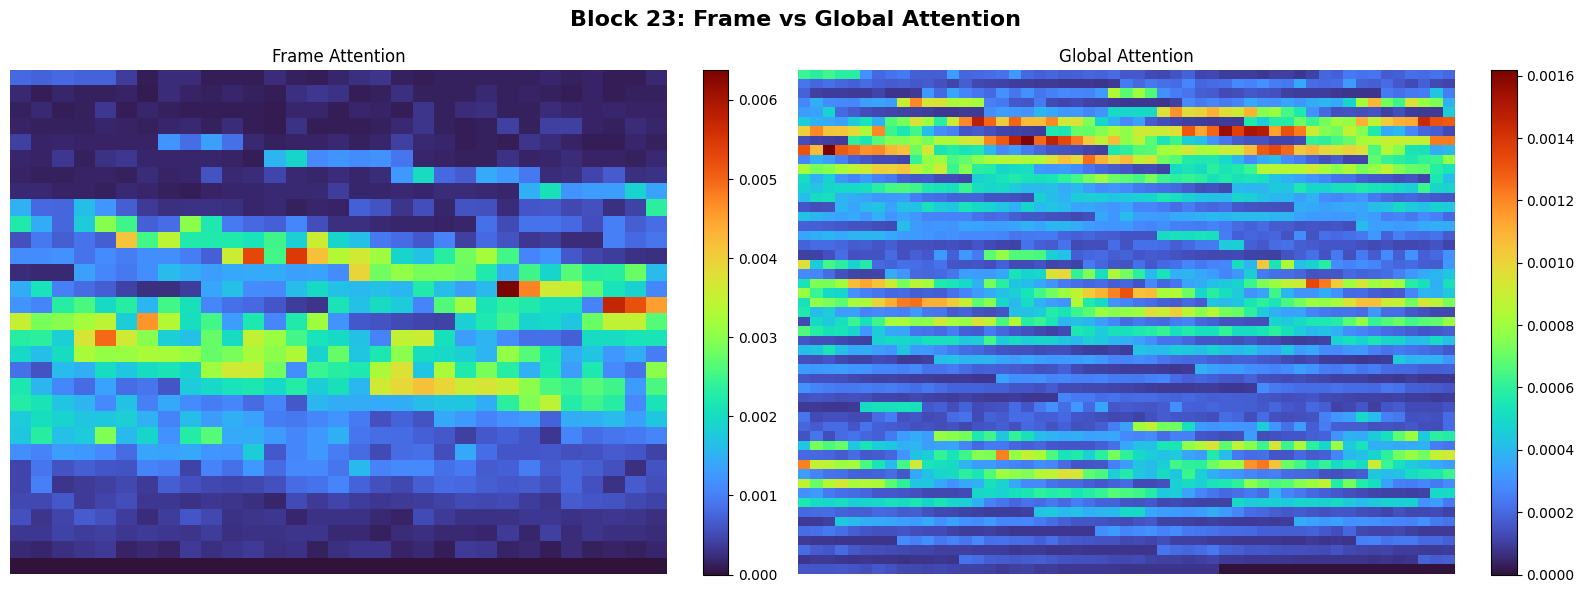


完成！


In [6]:
# 比較同一個 block 的 frame 和 global attention
block_idx = 23
head_idx = 0

# 先確定安全的 token_idx
test_data = demo_single_layer_attention(
    image_paths,
    block_idx=block_idx,
    attention_type='global',
    token_idx=0,
    head_idx=0,
    mode='data'
)
token_idx = min(500, test_data['num_tokens'] - 1)
print(f"使用 token_idx: {token_idx}")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(f'Block {block_idx}: Frame vs Global Attention', fontsize=16, fontweight='bold')

for idx, attn_type in enumerate(['frame', 'global']):
    print(f"Processing {attn_type} attention...")
    data = demo_single_layer_attention(
        image_paths,
        block_idx=block_idx,
        attention_type=attn_type,
        token_idx=token_idx,
        head_idx=head_idx,
        mode='data'
    )
    
    # 取得 attention weights
    attn = data['attention_weights'][0, head_idx, token_idx, :].numpy()
    
    # Reshape to 2D - 使用 ceil 確保 grid_size^2 >= num_tokens
    num_tokens = len(attn)
    grid_size = int(np.ceil(np.sqrt(num_tokens)))
    attn_padded = np.zeros(grid_size * grid_size)
    attn_padded[:num_tokens] = attn
    attn_2d = attn_padded.reshape(grid_size, grid_size)
    
    # Plot
    im = axes[idx].imshow(attn_2d, cmap='turbo', aspect='auto')
    axes[idx].set_title(f'{attn_type.capitalize()} Attention')
    axes[idx].axis('off')
    plt.colorbar(im, ax=axes[idx], fraction=0.046)

plt.tight_layout()
plt.show()
print("\n完成！")